# Lending Club Description Visualization

In this notebook, I visualize frequency distributions of n-grams in the 'desc' field after subsetting loans according to purpose.

There are 14 distinct loan purposes. I create visualizations for raw counts and Tf-Idf transformed counts.

In [1]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
start_time = time.perf_counter()

### 0. Data Load

In [2]:
%%time

# Read in csvs
debt_consolidation = pd.read_csv('../data/alldesc_by_purpose/debt_consolidation.csv', header=0, low_memory=False)
credit_card = pd.read_csv('../data/alldesc_by_purpose/credit_card.csv', header=0, low_memory=False)
home_improvement = pd.read_csv('../data/alldesc_by_purpose/home_improvement.csv', header=0, low_memory=False)
other = pd.read_csv('../data/alldesc_by_purpose/other.csv', header=0, low_memory=False)
major_purchase = pd.read_csv('../data/alldesc_by_purpose/major_purchase.csv', header=0, low_memory=False)
small_business = pd.read_csv('../data/alldesc_by_purpose/small_business.csv', header=0, low_memory=False)
car = pd.read_csv('../data/alldesc_by_purpose/car.csv', header=0, low_memory=False)
wedding = pd.read_csv('../data/alldesc_by_purpose/wedding.csv', header=0, low_memory=False)
medical = pd.read_csv('../data/alldesc_by_purpose/medical.csv', header=0, low_memory=False)
house = pd.read_csv('../data/alldesc_by_purpose/house.csv', header=0, low_memory=False)
moving = pd.read_csv('../data/alldesc_by_purpose/moving.csv', header=0, low_memory=False)
vacation = pd.read_csv('../data/alldesc_by_purpose/vacation.csv', header=0, low_memory=False)
educational = pd.read_csv('../data/alldesc_by_purpose/educational.csv', header=0, low_memory=False)
renewable_energy = pd.read_csv('../data/alldesc_by_purpose/renewable_energy.csv', header=0, low_memory=False)

Wall time: 8.44 s


### 1. Text Analysis

Now that we have the observations we're interested in, we can extract features.

We begin by using CountVectorizer to count word n-grams of size 1 to 4.

An example of an n-gram of size 1 would be "consolidation" while an n-gram of size 4 would be "credit card debt consolidation". The words must be contiguous in the text.

CountVectorizer converts a collection of text documents to a matrix of token counts. 
Here, each document is a user-provided loan description. 

TfIdfTransformer converts a count matrix to a normalized tf-idf (term frequency-inverse document frequency) representation. 
Explanation in a later cell.

In [3]:
%%time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Our features are word n-grams
analyzer = 'word'

# Create list of stop words
stop_nums = [str(i) for i in list(range(0, 101))]
stop_chars = [
    'br', 'added', 'borrower', 'pay',
    '000', '00', '01', '02', '03', '04', '05',
    '06', '07', '08', '09', '200', '2000',
    'to', 'on', 'and', 'the', 'my', 'for',
    'have', 'of', 'in', 'this', 'is', 'will',
    'off', 'with', 'be', 'am', 'that', 'it',
    'need', 'as', 'some', 'you', 'me', 'we',
    'would', 'been', 'at', 'so', 'very',
    'thank', 'you', 'an', 'get', 'all', 'are',
    'from', 'like', 'our', 'help', 'but', 'if',
    'not', 'was', 'has', 'just', 'do', 'up',
    'over', 'by', 'any', 'right', 'now',
    'month', 'year', 'xc2', 'x80', 'xc3', 'xa2'
]
stop_words = stop_chars + stop_nums

# Upper and lower bound of the range of n-values for n-grams to be extracted
ngram_range = (1, 4)

# Only interested in the 10000 most frequent n-grams
max_features = 10000

# Initialize vectorizer
cv = CountVectorizer(analyzer=analyzer, stop_words=stop_words,
                    ngram_range=ngram_range, max_features=max_features)

Wall time: 3.38 s


In [4]:
%%time
from yellowbrick.text import FreqDistVisualizer

def generate_raw_tfidf(df, tfidf=False):
    """
    This function takes a DataFrame as an input and uses
    CountVectorizer to output either raw token counts
    or Tf-Idf transformed token counts.
    
    Defaults to raw token counts.
    """
    X_raw = cv.fit_transform(text for text in df['desc'])
    transformer = TfidfTransformer()
    X_tfidf = transformer.fit_transform(X_raw)
    if tfidf == True:
        return X_tfidf
    else:
        return X_raw

def freq_dist(df, tfidf=False): 
    """ 
    This function takes a DataFrame as an input and outputs 
    a yellowbrick Frequency Distribution Visualizer.
    
    Defaults to raw token counts.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    data = generate_raw_tfidf(df, tfidf=tfidf)
    features = cv.get_feature_names()
    visualizer = FreqDistVisualizer(features=features)
    visualizer.fit(data)
    visualizer.poof()

Wall time: 1.43 s


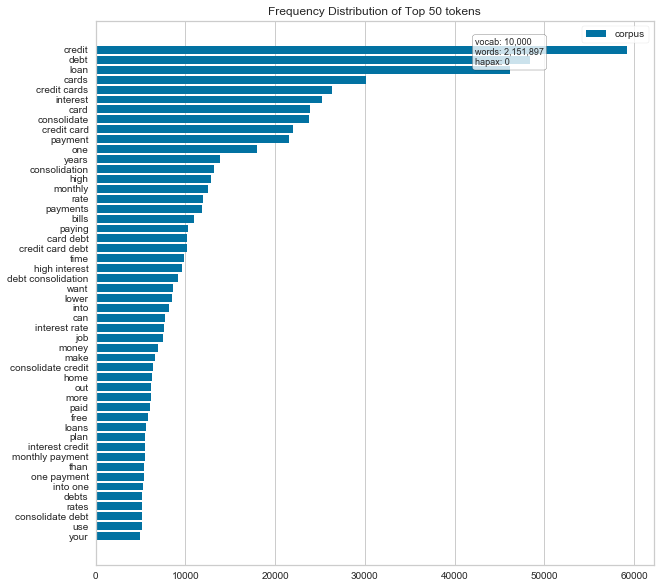

In [5]:
freq_dist(debt_consolidation)

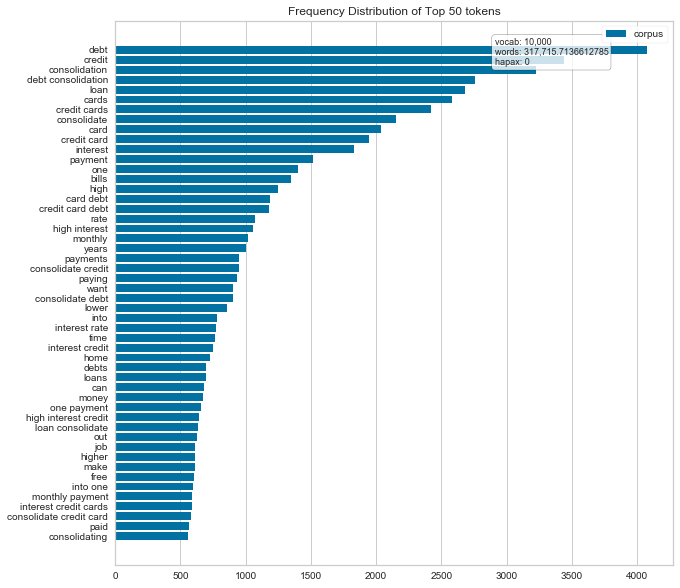

In [6]:
freq_dist(debt_consolidation, True)

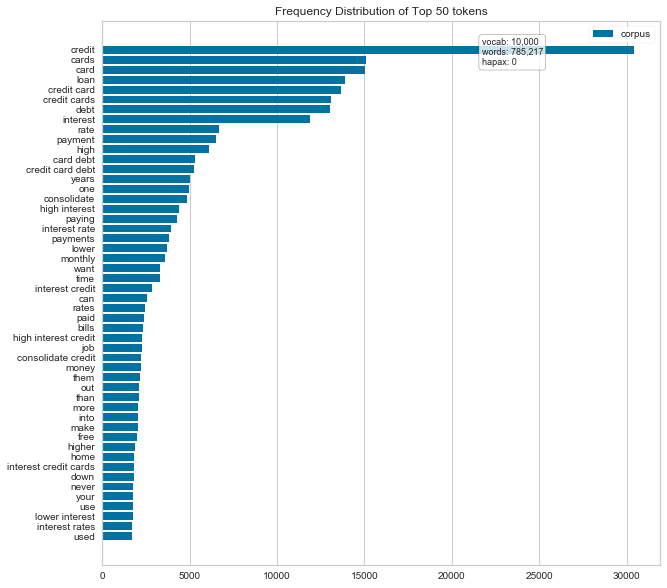

In [7]:
freq_dist(credit_card)

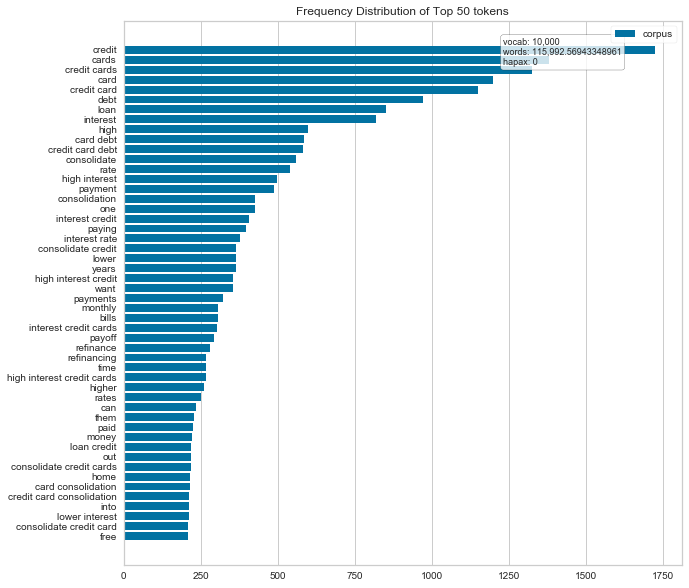

In [8]:
freq_dist(credit_card, True)

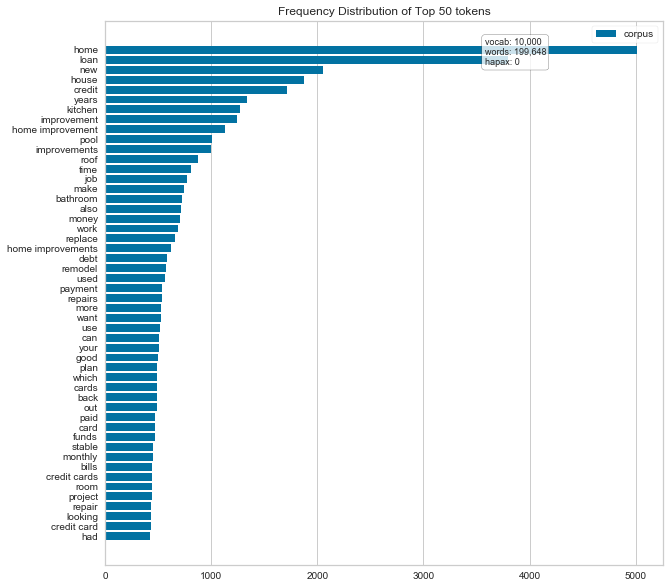

In [9]:
freq_dist(home_improvement)

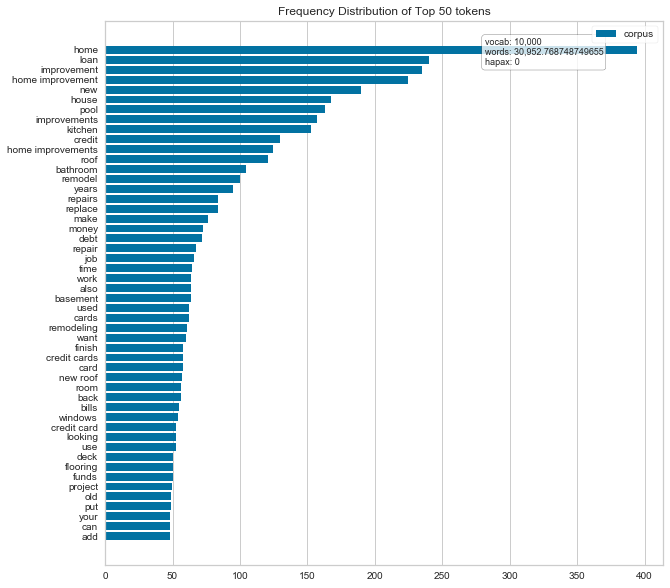

In [10]:
freq_dist(home_improvement, True)

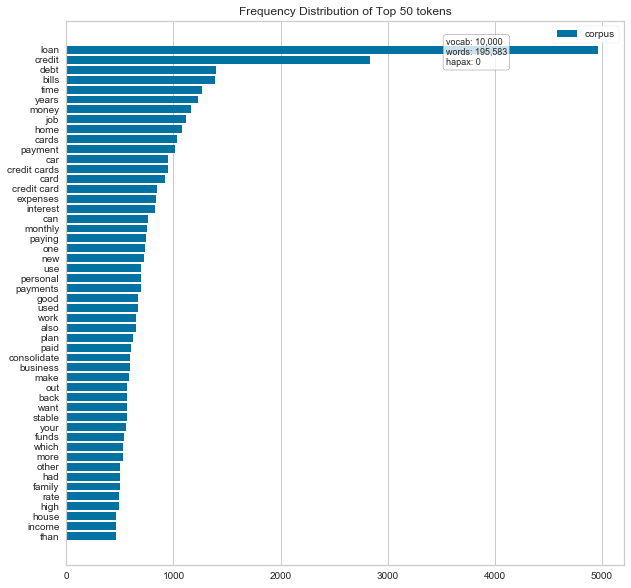

In [11]:
freq_dist(other)

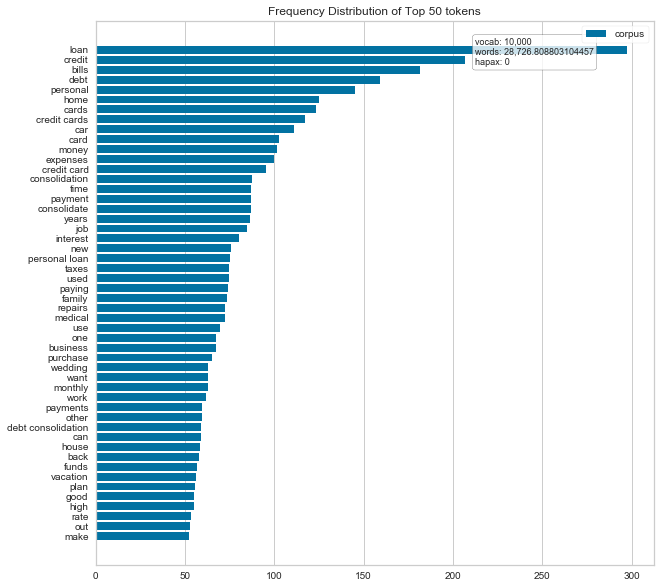

In [12]:
freq_dist(other, True)

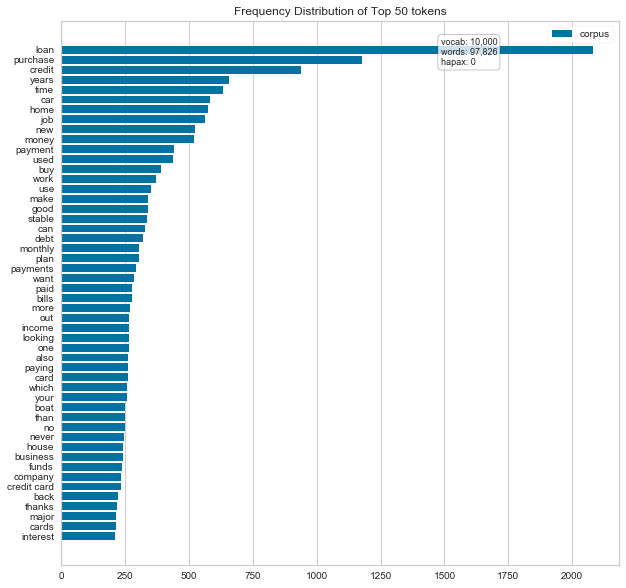

In [13]:
freq_dist(major_purchase)

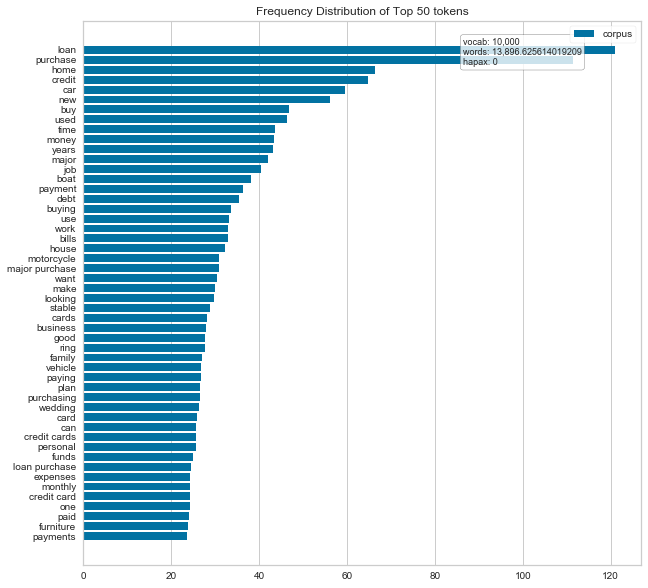

In [14]:
freq_dist(major_purchase, True)

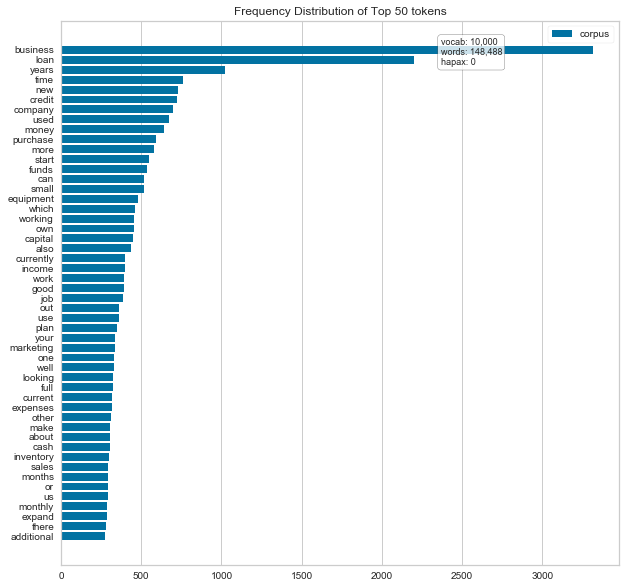

In [15]:
freq_dist(small_business)

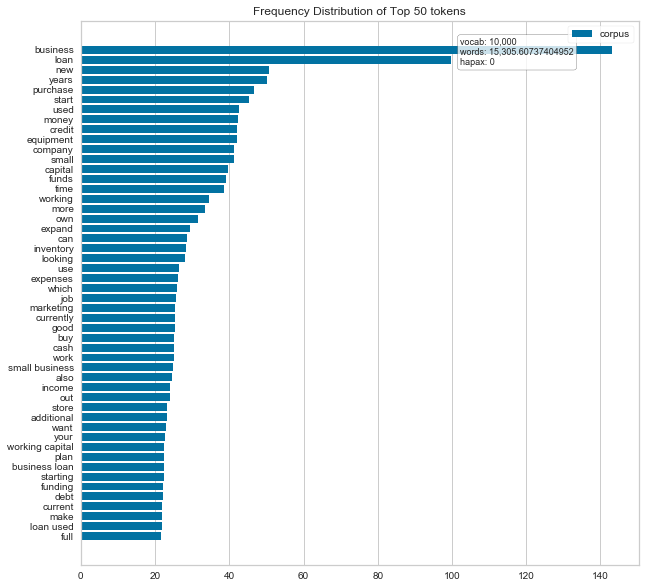

In [16]:
freq_dist(small_business, True)

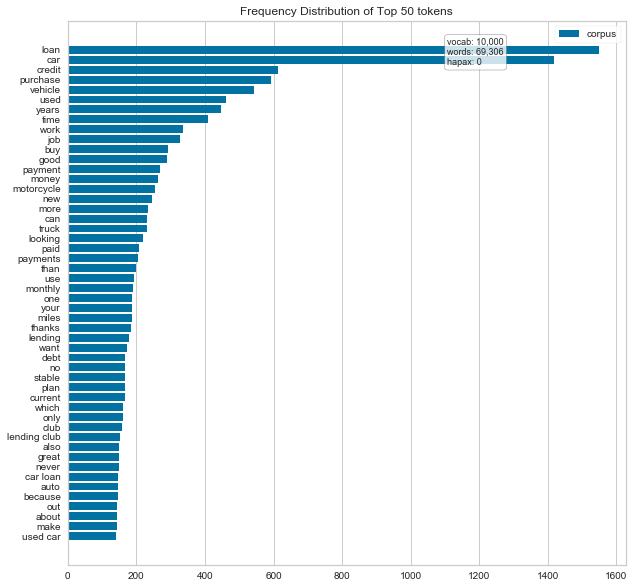

In [17]:
freq_dist(car)

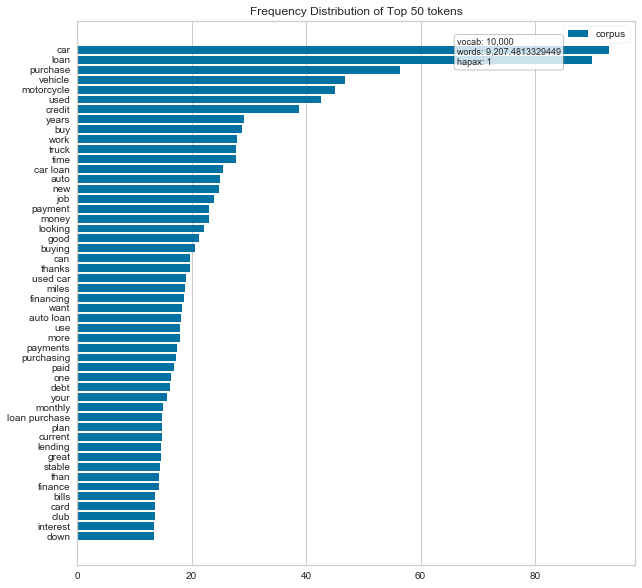

In [18]:
freq_dist(car, True)

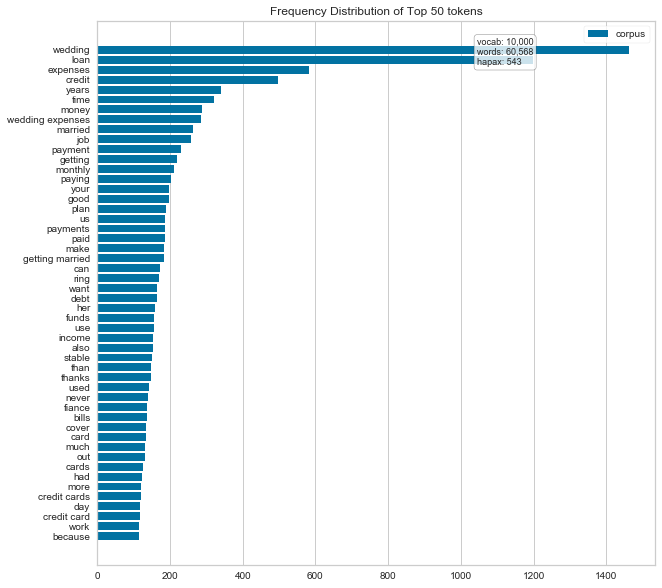

In [19]:
freq_dist(wedding)

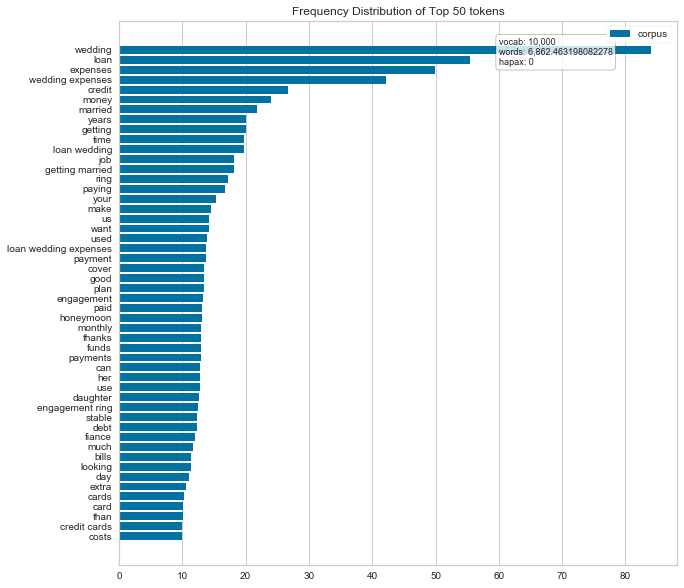

In [20]:
freq_dist(wedding, True)

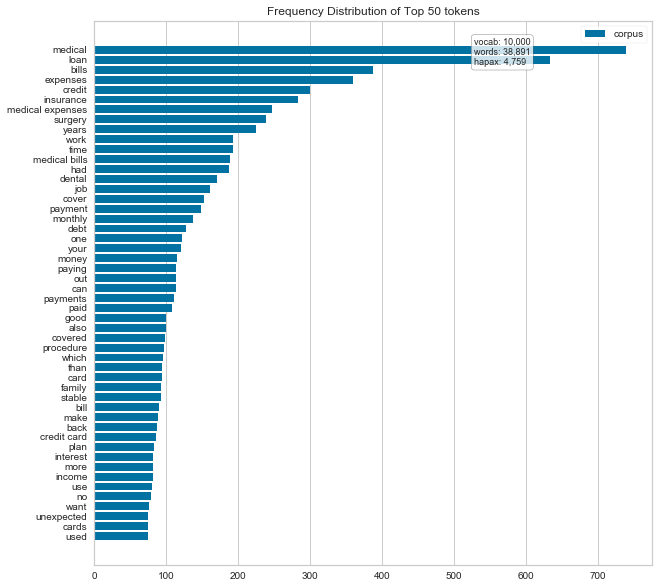

In [21]:
freq_dist(medical)

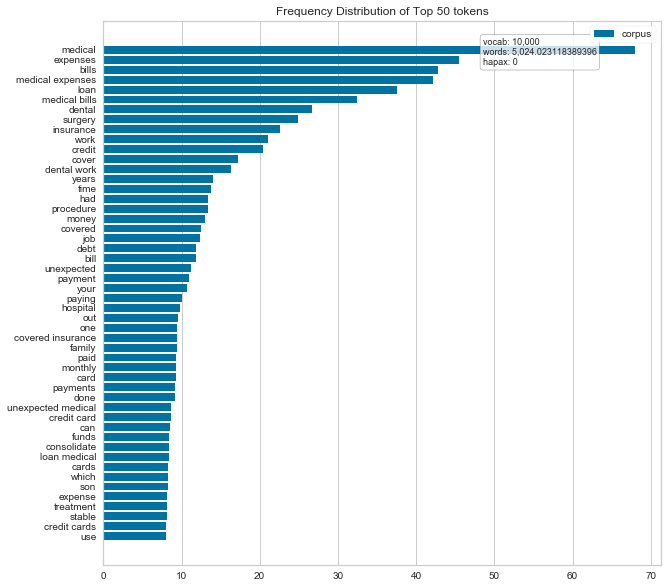

In [22]:
freq_dist(medical, True)

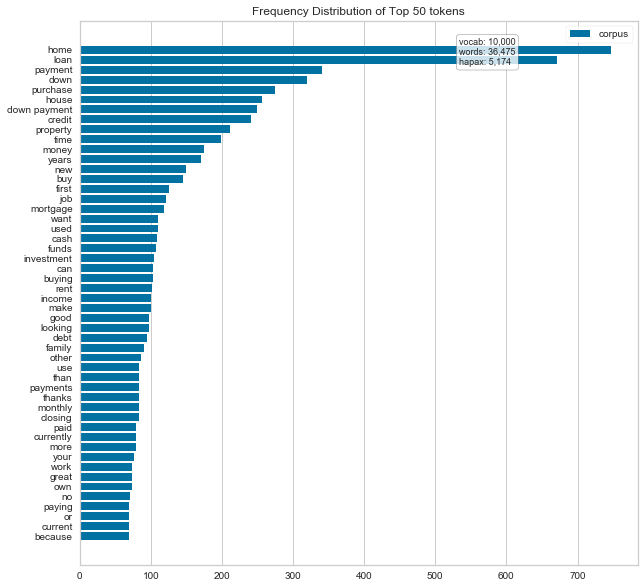

In [23]:
freq_dist(house)

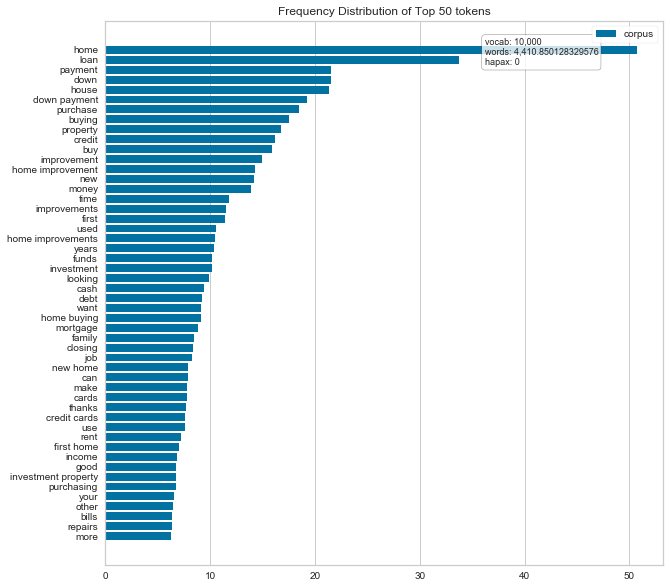

In [24]:
freq_dist(house, True)

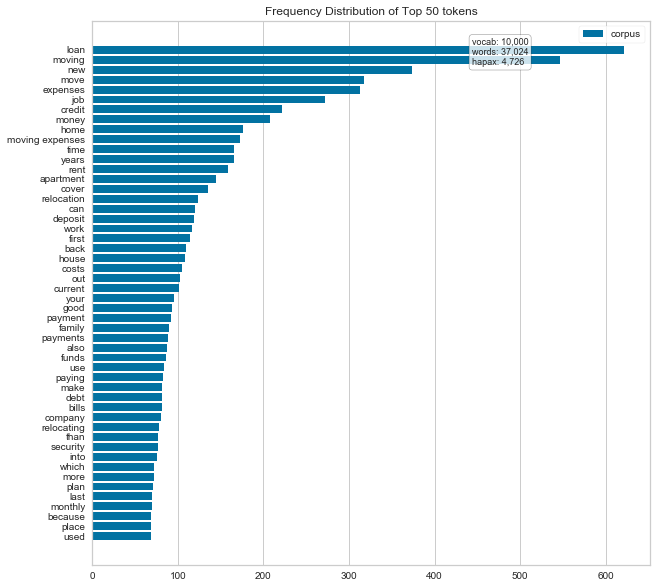

In [25]:
freq_dist(moving)

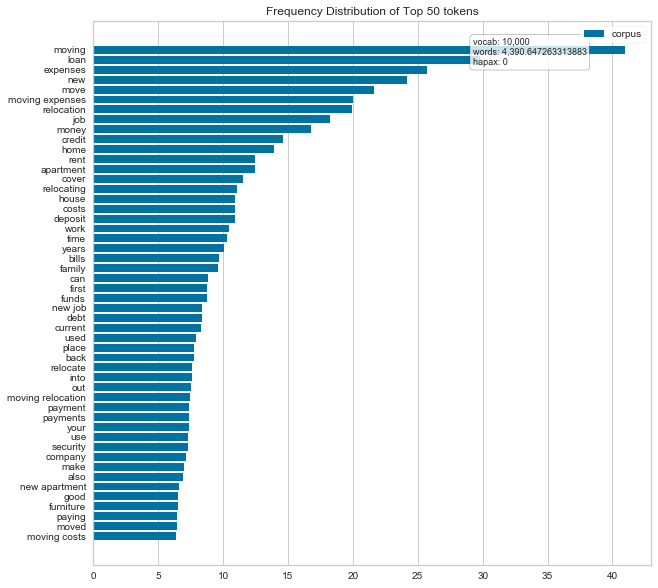

In [26]:
freq_dist(moving, True)

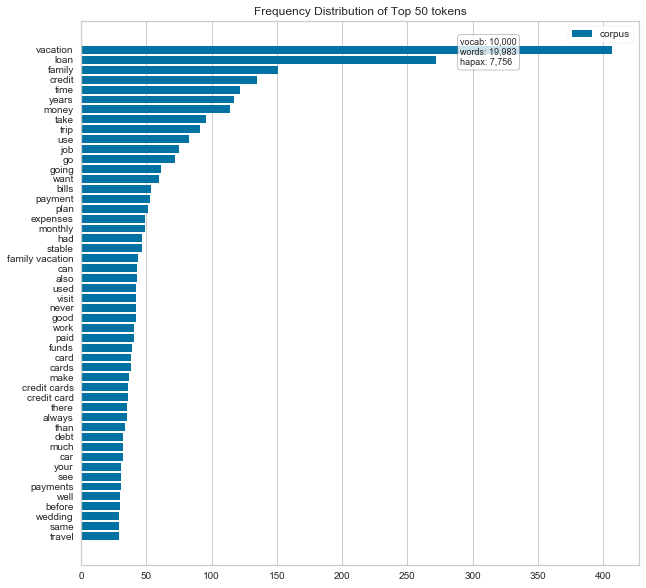

In [27]:
freq_dist(vacation)

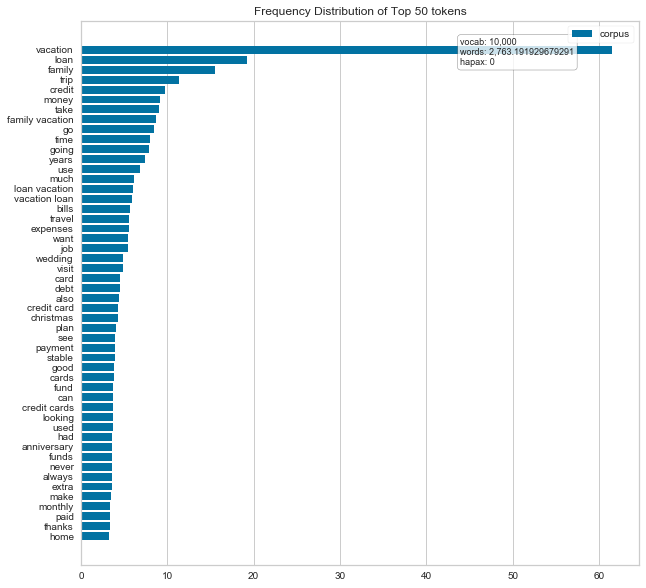

In [28]:
freq_dist(vacation, True)

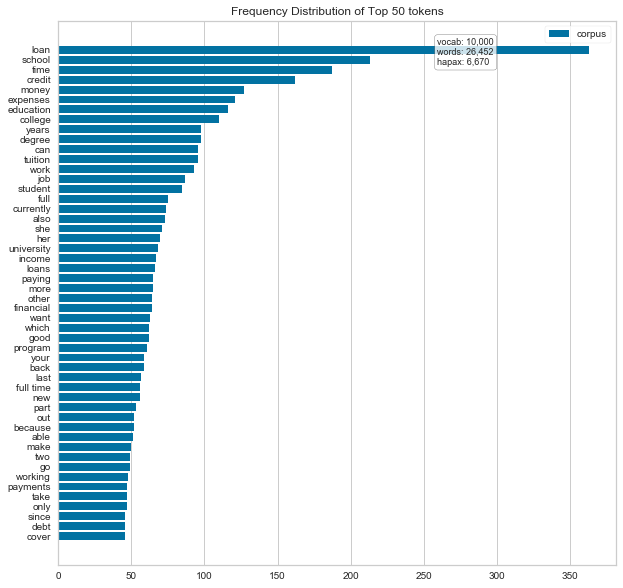

In [29]:
freq_dist(educational)

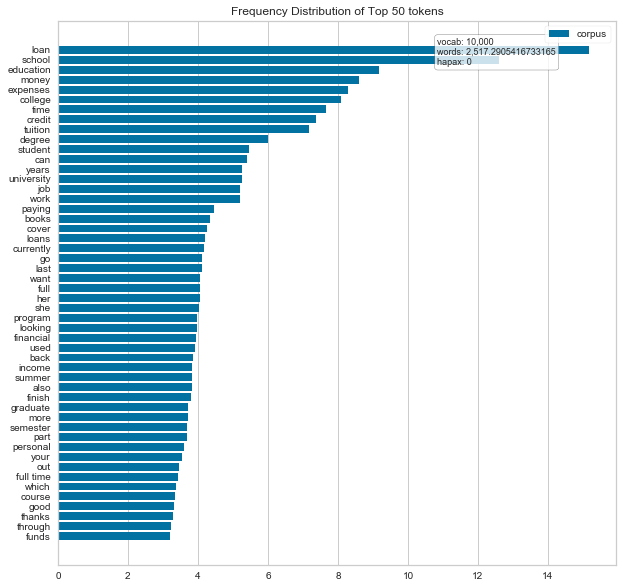

In [30]:
freq_dist(educational, True)

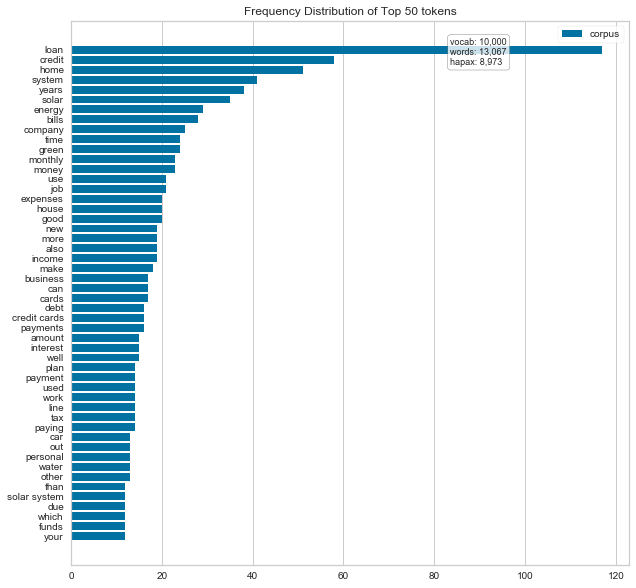

In [31]:
freq_dist(renewable_energy)

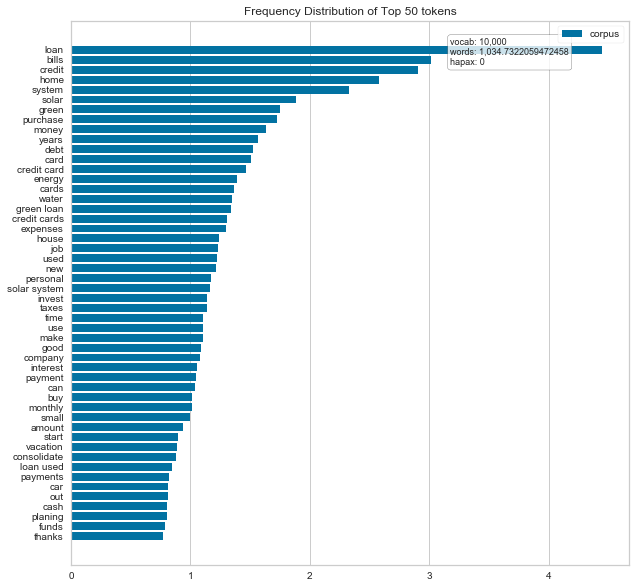

In [32]:
freq_dist(renewable_energy, True)

In [33]:
end_time = (time.perf_counter() - start_time)/60
print("This notebook took {:0.2f} minutes to run".format(end_time))

This notebook took 1.14 minutes to run
